In [1]:
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('C:/Users/31442/Desktop/Data Analyst _ Sample Data _HDM - call-data-udpated.csv')

In [3]:
print(data.head())

   Call Id  Lead Id  Campaign ID  Advertiser Id  \
0    26807   410987       930228           1883   
1    26808   410986       930228           1883   
2    26809   410985       930228           1883   
3    26810   410984       930228           1883   
4    26811   410981       930228           1883   

                               Hid Call Status     Lead Status  \
0  40831aceu6850re1ece43deeqf20a6o   no-answer  Not Interested   
1  3dc489fbg6850pe1ece43deewf20a6v   completed  Not Interested   
2  92d7bfbag6850se1ece43deevf20a6y   no-answer  Invalid Number   
3  3a9872eem6850oe1ece43deetf20a6m   completed  Not Interested   
4  3dde873bx6850je1ece43deehf20a6u   no-answer            Busy   

   Agent Duration(seconds)  Customer Duration(seconds)  From Calling Number  \
0                        8                           0         9.186570e+11   
1                       51                          34         9.186570e+11   
2                        9                           0     

# 1. Compaign Performance Report

In [4]:
# Total calls
total_calls = data['Call Id'].count()

# Unique leads
unique_leads = data['Lead Id'].nunique()

# Calls connected
calls_connected = data[data['Call Status'] == 'Answered']['Call Id'].count()

# Unique calls connected
unique_calls_connected = data[data['Call Status'] == 'Answered']['Lead Id'].nunique()

# Leads converted
leads_converted = data[data['Lead Status'] == 'Interested']['Call Id'].count()

# Leads lost
leads_lost = data[data['Lead Status'] == 'Not Interested']['Call Id'].count()

# Average agent call duration
avg_agent_call_duration = data['Agent Duration(seconds)'].mean()

# Average customer call duration
avg_customer_call_duration = data['Customer Duration(seconds)'].mean()

# Print the results
print(f"Total Calls: {total_calls}")
print(f"Unique Leads: {unique_leads}")
print(f"Calls Connected: {calls_connected}")
print(f"Unique Calls Connected: {unique_calls_connected}")
print(f"Leads Converted: {leads_converted}")
print(f"Leads Lost: {leads_lost}")
print(f"Average Agent Call Duration: {avg_agent_call_duration}")
print(f"Average Customer Call Duration: {avg_customer_call_duration}")

Total Calls: 24494
Unique Leads: 8276
Calls Connected: 0
Unique Calls Connected: 0
Leads Converted: 3446
Leads Lost: 4907
Average Agent Call Duration: 36.08696007185433
Average Customer Call Duration: 13.05507471217441


# 2. Lead Disposition Report


In [5]:
# Distribution of call statuses
lead_disposition = data['Lead Status'].value_counts()

print(lead_disposition)


Lead Status
No Answer                 6432
Not Interested            4907
Busy                      3712
Interested                3446
Not Reachable             1433
Voice Issue               1195
Invalid Number             783
Language Barrier           657
Bought Another Product     478
Call Back                  444
Already Bought             340
Already Verified           240
Opt Out                    107
Already Buy/ Bought         87
Failed                      78
Out of Geo Location         57
Not Eligible - Income       53
Not Eligible - Age          16
Hung-up                     10
Duplicate                    9
Status26                     9
Ringing                      1
Name: count, dtype: int64


In [6]:
# Distribution of call statuses
call_status_distribution = data['Call Status'].value_counts()
print(call_status_distribution)


Call Status
no-answer    16035
completed     8454
failed           5
Name: count, dtype: int64


# AGENT PERFORMANCE REPORT

In [21]:
# Number of calls made per agent
calls_per_agent = data.groupby('Agent Name')['Call Id'].count()

print(calls_per_agent)
print(sum(calls_per_agent))

Agent Name
ATHARV GAWADE            386
Abhijit Bhatt           1144
Amitabh Bachchan         997
Gaurav Rawat              44
Geetanjali Dhiman        528
Manjeet Rawat            662
Manneajeet Singh          27
Mansi Jaiswal           4121
Mayank                    57
Mohammad Husain Raza     743
Mumtaz                  2439
Nainsee Jaiswal         4329
Niharika Bhatt           580
Rahul                   1296
Shadab Khan                1
Shwetha                  701
Tabassum                2920
Thahasina Shaik          656
Uzma Khan                104
Wasim Khan                 4
Zubiya                  2120
prerna giri              570
priyansh shrotriya        65
Name: Call Id, dtype: int64
24494


In [8]:
# Calls connected per agent
calls_connected_per_agent = data[data['Call Status'] == 'Answered'].groupby('Agent Name')['Call Id'].count()

print(calls_connected_per_agent)


Series([], Name: Call Id, dtype: int64)


In [22]:
# Leads converted per agent
leads_converted_per_agent = data[data['Lead Status'] == 'Interested'].groupby('Agent Name')['Call Id'].count()
print(leads_converted_per_agent)
print(sum(leads_converted_per_agent))

Agent Name
ATHARV GAWADE            31
Abhijit Bhatt           142
Amitabh Bachchan        117
Gaurav Rawat              8
Geetanjali Dhiman        46
Manjeet Rawat            69
Manneajeet Singh          4
Mansi Jaiswal           696
Mayank                    5
Mohammad Husain Raza     97
Mumtaz                  374
Nainsee Jaiswal         684
Niharika Bhatt           64
Rahul                   253
Shwetha                  97
Tabassum                315
Thahasina Shaik          98
Uzma Khan                15
Zubiya                  248
prerna giri              69
priyansh shrotriya       14
Name: Call Id, dtype: int64
3446


In [10]:
# Average agent call duration per agent
avg_agent_call_duration_per_agent = data.groupby('Agent Name')['Agent Duration(seconds)'].mean()

print(avg_agent_call_duration_per_agent)

Agent Name
ATHARV GAWADE           39.007772
Abhijit Bhatt           47.039336
Amitabh Bachchan        22.425276
Gaurav Rawat            45.181818
Geetanjali Dhiman       37.636364
Manjeet Rawat           37.415408
Manneajeet Singh        21.481481
Mansi Jaiswal           37.227129
Mayank                  35.508772
Mohammad Husain Raza    35.360700
Mumtaz                  35.600246
Nainsee Jaiswal         36.870640
Niharika Bhatt          45.291379
Rahul                   39.003086
Shadab Khan              4.000000
Shwetha                 43.790300
Tabassum                30.703767
Thahasina Shaik         45.254573
Uzma Khan               12.230769
Wasim Khan              26.750000
Zubiya                  30.665566
prerna giri             37.826316
priyansh shrotriya      38.676923
Name: Agent Duration(seconds), dtype: float64


In [11]:
# Average customer call duration per agent
avg_customer_call_duration_per_agent = data.groupby('Agent Name')['Customer Duration(seconds)'].mean()

print(avg_customer_call_duration_per_agent)

Agent Name
ATHARV GAWADE           15.225389
Abhijit Bhatt           18.790210
Amitabh Bachchan         6.158475
Gaurav Rawat            18.500000
Geetanjali Dhiman       13.119318
Manjeet Rawat            9.685801
Manneajeet Singh         9.518519
Mansi Jaiswal           13.658578
Mayank                  14.087719
Mohammad Husain Raza    12.846568
Mumtaz                  14.017220
Nainsee Jaiswal         13.173250
Niharika Bhatt          18.594828
Rahul                   16.128086
Shadab Khan              0.000000
Shwetha                 17.088445
Tabassum                 9.866438
Thahasina Shaik         17.626524
Uzma Khan                4.076923
Wasim Khan               9.250000
Zubiya                   9.943868
prerna giri             13.266667
priyansh shrotriya      13.153846
Name: Customer Duration(seconds), dtype: float64


# 3.Forecasting

In [12]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('C:/Users/31442/Desktop/Data Analyst _ Sample Data _HDM - call-data-udpated.csv')

# Convert the 'created_at' column to datetime format
data['Created At'] = pd.to_datetime(data['Created At'] ,format="%d-%m-%Y %H:%M")

# Set the 'created_at' column as the index
data.set_index('Created At', inplace=True)

# Resample the data by day and count the number of calls
daily_calls = data.resample('D').size()

# Print to verify the resampled data
print(daily_calls)

# Apply Exponential Smoothing
model = ExponentialSmoothing(daily_calls, seasonal='add', seasonal_periods=7)
fit = model.fit()
call_volume_forecast = fit.forecast(30)

# Print the forecasted values
print(call_volume_forecast)


Created At
2024-04-01     406
2024-04-02     388
2024-04-03     389
2024-04-04     421
2024-04-05     460
2024-04-06     692
2024-04-07       0
2024-04-08     671
2024-04-09     836
2024-04-10     837
2024-04-11       0
2024-04-12       0
2024-04-13      12
2024-04-14       0
2024-04-15     536
2024-04-16     746
2024-04-17     437
2024-04-18     588
2024-04-19     236
2024-04-20     205
2024-04-21      13
2024-04-22     181
2024-04-23     159
2024-04-24      79
2024-04-25      31
2024-04-26       6
2024-04-27       1
2024-04-28       0
2024-04-29       1
2024-04-30       2
2024-05-01       3
2024-05-02      21
2024-05-03      32
2024-05-04      25
2024-05-05       3
2024-05-06     150
2024-05-07     603
2024-05-08    1368
2024-05-09    1724
2024-05-10    2153
2024-05-11    2120
2024-05-12      70
2024-05-13    2607
2024-05-14    2787
2024-05-15    2495
Freq: D, dtype: int64
2024-05-16    2373.773182
2024-05-17    2352.735623
2024-05-18    2374.441848
2024-05-19    1831.751105
2024-05-

# Visualize and Document Results

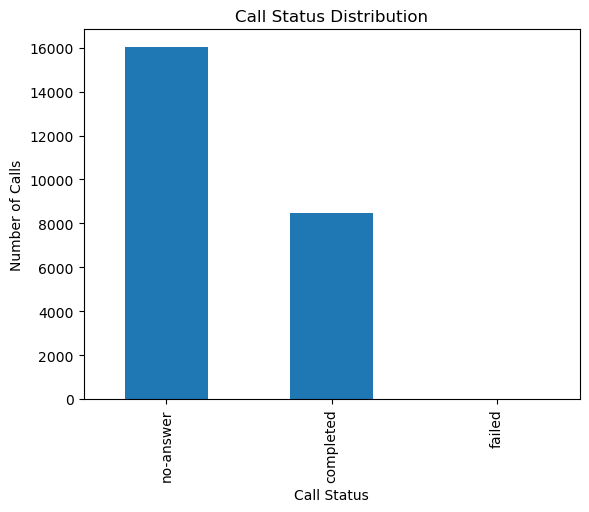

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for call statuses
call_status_distribution.plot(kind='bar')
plt.title('Call Status Distribution')
plt.xlabel('Call Status')
plt.ylabel('Number of Calls')
plt.show()



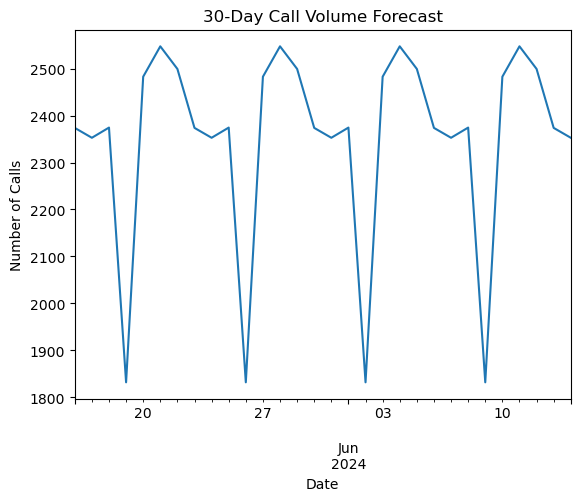

In [15]:
# Line chart for call volume forecast
call_volume_forecast.plot(kind='line')
plt.title('30-Day Call Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()z

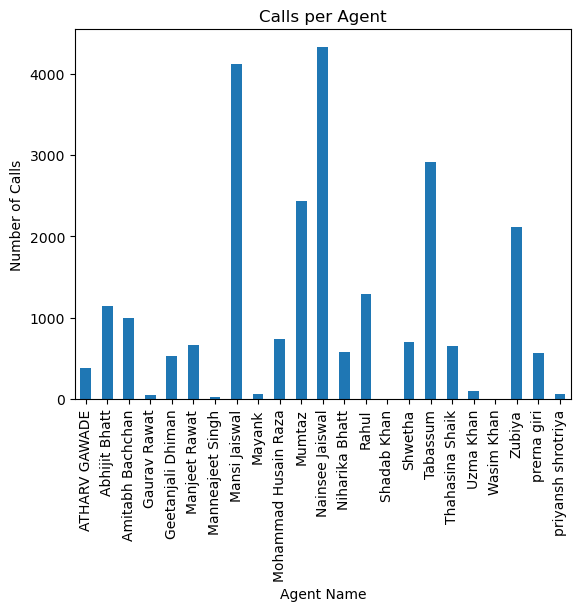

In [18]:
# Bar chart for agent performance
calls_per_agent.plot(kind='bar')
plt.title('Calls per Agent')
plt.xlabel('Agent Name')
plt.ylabel('Number of Calls')
plt.show()


# LEADS converted by per agent.


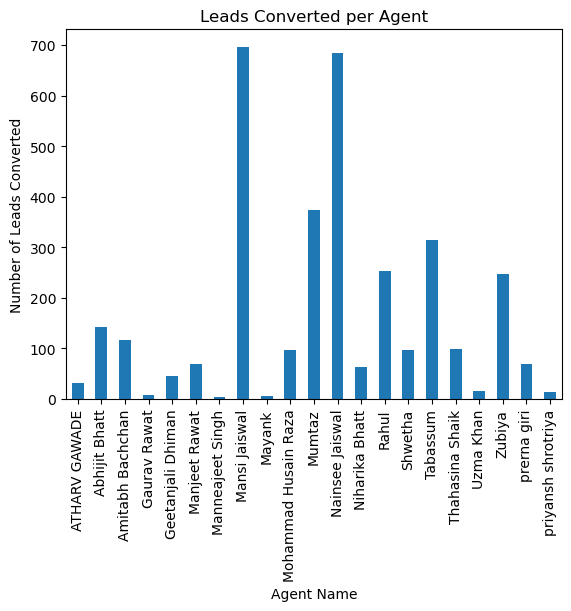

In [20]:
leads_converted_per_agent.plot(kind='bar')
plt.title('Leads Converted per Agent')
plt.xlabel('Agent Name')
plt.ylabel('Number of Leads Converted')
plt.show()
